In [53]:
!pip install icd9cms

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 15.7 MB/s eta 0:00:00


In [56]:
!pip install googletrans==4.0.0-rc1

In [140]:
#1. Hücre: Kütüphaneler ve Veri Yükleme
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Görselleştirme ayarları
%matplotlib inline
sns.set_style("whitegrid")
pd.set_option('display.max_columns', None) # Tüm sütunları görmek için

# Veriyi yükle (Dosya adının 'diabetic_data.csv' olduğunu varsayıyorum)
# '?' karakterlerini otomatik olarak NaN (Eksik Veri) yapıyoruz.
df = pd.read_csv('/content/drive/MyDrive/deneme/diabetes_130_raw.csv', na_values=['?'], low_memory=False)

print(f"Veri Seti Boyutu: {df.shape}")
df.head()

Veri Seti Boyutu: (101766, 50)


,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,NaN,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,NaN,NaN,1,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,NaN,NaN,59,0,18,0,0,0,276,250.01,255,9,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,NaN,NaN,11,5,13,2,0,1,648,250,V27,6,NaN,NaN,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,NaN,NaN,44,1,16,0,0,0,8,250.43,403,7,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,NaN,NaN,51,0,8,0,0,0,197,157,250,5,NaN,NaN,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [113]:
import googletrans

# Yöntem 2: Otomatik Çeviri Fonksiyonu (Eğer googletrans yüklüyse çalışır)
def get_column_descriptions(columns):
    descriptions = {}
    translator = None

    try:
        from googletrans import Translator
        translator = Translator()
        print("\n[BİLGİ] 'googletrans' kütüphanesi bulundu. Sütun isimleri otomatik çevriliyor...")
    except ImportError:
        print("\n[BİLGİ] Otomatik çeviri için 'googletrans' bulunamadı.")
        for col in columns:
            descriptions[col] = "bulunamadı"
        return descriptions
    except Exception as e:
        print(f"\n[UYARI] Otomatik çeviri kütüphanesi yüklenirken hata: {e}")
        for col in columns:
            descriptions[col] = "bulunamadı"
        return descriptions

    # Her bir sütunu çevirmeye çalış
    for col in columns:
        try:
            text_to_translate = col.replace('_', ' ')
            translated_text = translator.translate(text_to_translate, src='en', dest='tr').text
            descriptions[col] = translated_text.title() # Baş harfleri büyüt
        except Exception as e:
            print(f"[UYARI] '{col}' sütunu çevrilirken hata: {e}. 'bulunamadı' olarak ayarlandı.")
            descriptions[col] = "bulunamadı"

    return descriptions

print("\n--- Veri Seti Sütun Anlamları ---")
final_descriptions = get_column_descriptions(df.columns)

col_guide = []
for col in df.columns:
    col_guide.append({
        'Sütun Adı': col,
        'Türkçe Açıklama': final_descriptions.get(col, 'bulunamadı'),
        'Veri Tipi': str(df[col].dtype)
    })

col_guide_df = pd.DataFrame(col_guide)
print(col_guide_df.to_string(index=False))


--- Veri Seti Sütun Anlamları ---

[BİLGİ] 'googletrans' kütüphanesi bulundu. Sütun isimleri otomatik çevriliyor...
               Sütun Adı                   Türkçe Açıklama Veri Tipi
            encounter_id                Karşılaşma Kimliği     int64
             patient_nbr                    Hasta Numarası     int64
                    race                               Irk    object
                  gender                          Cinsiyet    object
                     age                               Yaş    object
                  weight                           Ağırlık    object
       admission_type_id                Giriş Türü Kimliği     int64
discharge_disposition_id           Boşaltma Düzeni Kimliği     int64
     admission_source_id             Giriş Kaynağı Kimliği     int64
        time_in_hospital          Hastanede Geçirilen Süre     int64
              payer_code                        Ödeme Kodu    object
       medical_specialty                    Tıbbi Uzman


2. EDA ve Eksik Veri Görselleştirmesi...


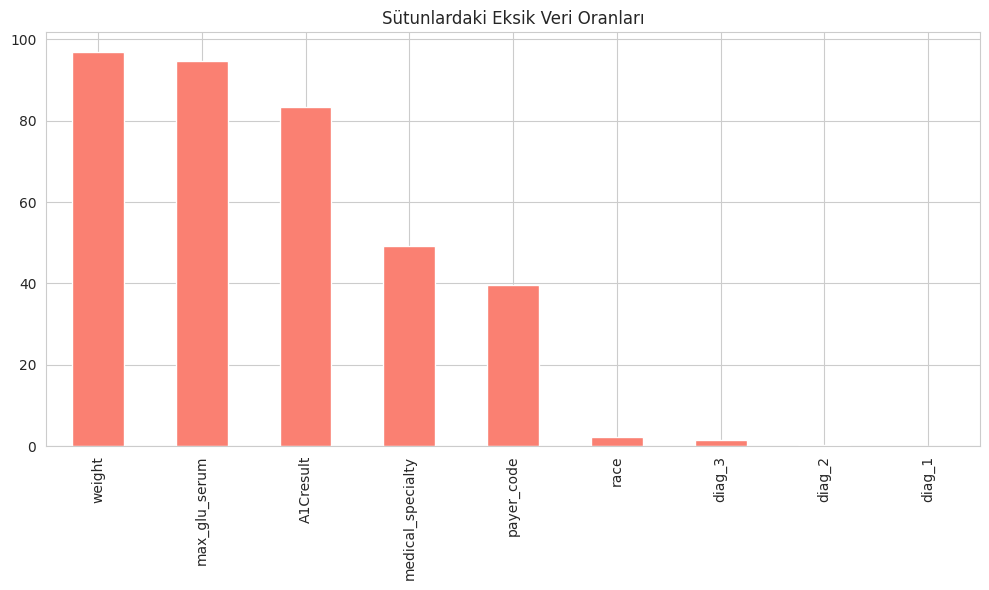

In [81]:
print("\n2. EDA ve Eksik Veri Görselleştirmesi...")
# '?' işaretlerini NaN yapıyoruz ki pandas bunları eksik olarak tanısın
df = df.replace('?', np.nan)

missing_ratio = df.isnull().sum() / len(df) * 100
plt.figure(figsize=(10, 6))
missing_ratio[missing_ratio > 0].sort_values(ascending=False).plot(kind='bar', color='salmon')
plt.title('Sütunlardaki Eksik Veri Oranları')
plt.tight_layout()
plt.show()

In [83]:
#2. Hücre: Temel Temizlik (Gereksiz Sütun ve Satırlar)
# Toplam eksik veri sayısını hesapla
total = df.isnull().sum().sort_values(ascending=False)

# Eksik verilerin tüm veriye oranını (%) hesapla
percent = (df.isnull().sum() / df.isnull().count() * 100).sort_values(ascending=False)

# Bunları bir tablo (DataFrame) haline getir
missing_data = pd.concat([total, percent], axis=1, keys=['Toplam Eksik (Adet)', 'Yüzde (%)'])

# Sadece eksik veri içeren sütunları filtrele ve göster
missing_data = missing_data[missing_data['Toplam Eksik (Adet)'] > 0]

print("Eksik Veri İçeren Sütunlar:")
display(missing_data)

Eksik Veri İçeren Sütunlar:


,Toplam Eksik (Adet),Yüzde (%)
weight,98569,96.858479
max_glu_serum,96420,94.746772
A1Cresult,84748,83.277322
medical_specialty,49949,49.082208
payer_code,40256,39.557416
race,2273,2.233555
diag_3,1423,1.398306
diag_2,358,0.351787
diag_1,21,0.020636


In [141]:
# ID sütunlarını atma (Data Leakage ve Overfitting'i önlemek için)
# encounter_id ve patient_nbr tekil kimliklerdir, örüntü içermez.
df = df.drop(['encounter_id', 'patient_nbr'], axis=1)

In [142]:
# Çok fazla eksik veri içeren sütunları atma
# weight, payer_code ve medical_specialty sütunlarında çok fazla kayıp var.
df = df.drop(['weight', 'payer_code', 'medical_specialty'], axis=1)

print(f"Temizlik Sonrası Boyut: {df.shape}")

Temizlik Sonrası Boyut: (101766, 45)


In [143]:
# 2. SATIRLARI DOLDURMA (IMPUTATION) - SİLMEK YERİNE
# 'race' sütunundaki eksikleri 'Other' olarak dolduralım
if 'race' in df.columns:
    df['race'] = df['race'].fillna('Other')

# 'diag_1', 'diag_2', 'diag_3' sütunlarındaki eksikleri 'Other' yapalım
for col in ['diag_1', 'diag_2', 'diag_3']:
    if col in df.columns:
        df[col] = df[col].fillna('Other')

In [117]:
print("\n--- Gender (Cinsiyet) Sütunu Dağılımı (Temizlik Öncesi) ---")
print(df['gender'].value_counts())


--- Gender (Cinsiyet) Sütunu Dağılımı (Temizlik Öncesi) ---
gender
Female             54708
Male               47055
Unknown/Invalid        3
Name: count, dtype: int64


In [144]:
# 'Gender' sütununda 'Unknown/Invalid' olan az sayıda kaydı atma
df = df[df['gender'] != 'Unknown/Invalid']

/tmp/ipython-input-509632763.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='readmitted', data=df, palette='viridis', order=['<30', '>30', 'NO'])
/tmp/ipython-input-509632763.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='target', data=df, palette='coolwarm')


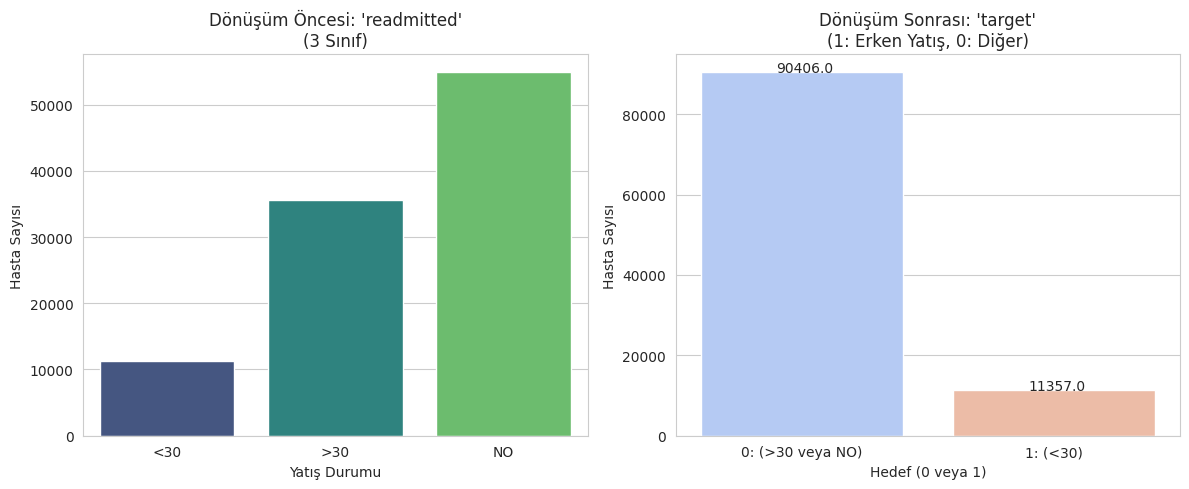

In [145]:
 # readmitted(yeniden yatış) sütunu için dönüşüm yapıyoruz
if 'readmitted' in df.columns:
        # --- GÖRSELLEŞTİRME BAŞLANGICI ---
        plt.figure(figsize=(12, 5))

        # Grafik 1: Dönüşüm Öncesi (3 Sınıf)
        plt.subplot(1, 2, 1)
        sns.countplot(x='readmitted', data=df, palette='viridis', order=['<30', '>30', 'NO'])
        plt.title("Dönüşüm Öncesi: 'readmitted'\n(3 Sınıf)")
        plt.xlabel("Yatış Durumu")
        plt.ylabel("Hasta Sayısı")

        # Dönüşüm İşlemi
        df['target'] = df['readmitted'].apply(lambda x: 1 if x == '<30' else 0)

        # Grafik 2: Dönüşüm Sonrası (2 Sınıf - Binary)
        plt.subplot(1, 2, 2)
        ax = sns.countplot(x='target', data=df, palette='coolwarm')
        plt.title("Dönüşüm Sonrası: 'target'\n(1: Erken Yatış, 0: Diğer)")
        plt.xlabel("Hedef (0 veya 1)")
        plt.ylabel("Hasta Sayısı")
        plt.xticks([0, 1], ['0: (>30 veya NO)', '1: (<30)'])

        # Çubukların üzerine sayıları yazdırma
        for p in ax.patches:
            ax.annotate(f'{p.get_height()}', (p.get_x() + 0.3, p.get_height() + 50))

        plt.tight_layout()
        plt.show()
        # --- GÖRSELLEŞTİRME BİTİŞİ ---

        # Orijinal 'readmitted' sütununu artık silebiliriz
        df = df.drop('readmitted', axis=1)
else:
        print("readmitted yok")


In [120]:
# Dengesizlik Oranını Göster
target_counts = df['target'].value_counts(normalize=True) * 100
print("\n--- SINIF DENGESİZLİĞİ ANALİZİ ---")
print(f"Target 0 (Diğerleri): %{target_counts[0]:.2f}")
print(f"Target 1 (Erken Yatış <30): %{target_counts[1]:.2f}")
print("NOT: Target 1 oranı düşük olduğu için modellerde 'Class Weight' stratejisi kullanılacaktır.")


--- SINIF DENGESİZLİĞİ ANALİZİ ---
Target 0 (Diğerleri): %88.84
Target 1 (Erken Yatış <30): %11.16
NOT: Target 1 oranı düşük olduğu için modellerde 'Class Weight' stratejisi kullanılacaktır.


target             0          1
A1Cresult                      
>7         89.952781  10.047219
>8         90.129017   9.870983
Norm       90.340681   9.659319


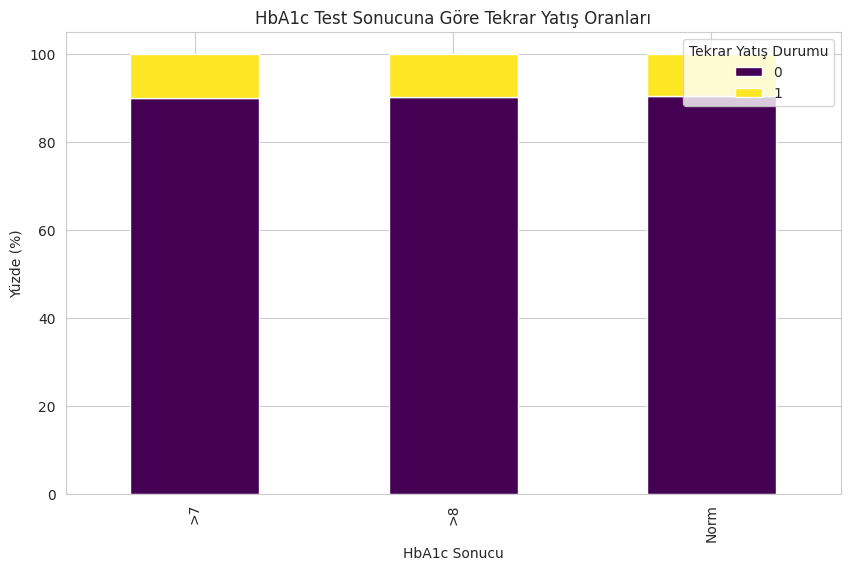

In [104]:
# 1. Seçenek: HbA1c Test Sonucu ve Tekrar Yatış İlişkisi
# normalize='index' diyerek sayıları değil, satır içindeki yüzdeleri (%) görürüz.
# Böylece "Testi >8 olanların % kaçı geri gelmiş?" daha net anlaşılır.

cross_tab_a1c = pd.crosstab(df['A1Cresult'], df['target'], normalize='index') * 100
print(cross_tab_a1c)

# Görselleştirme
cross_tab_a1c.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.title('HbA1c Test Sonucuna Göre Tekrar Yatış Oranları')
plt.ylabel('Yüzde (%)')
plt.xlabel('HbA1c Sonucu')
plt.legend(title='Tekrar Yatış Durumu', loc='upper right')
plt.show()

target            0          1
age                           
[0-10)    98.136646   1.863354
[10-20)   94.211288   5.788712
[20-30)   85.757393  14.242607
[30-40)   88.768212  11.231788
[40-50)   89.395973  10.604027
[50-60)   90.333797   9.666203
[60-70)   88.871097  11.128903
[70-80)   88.226042  11.773958
[80-90)   87.916497  12.083503
[90-100)  88.900823  11.099177


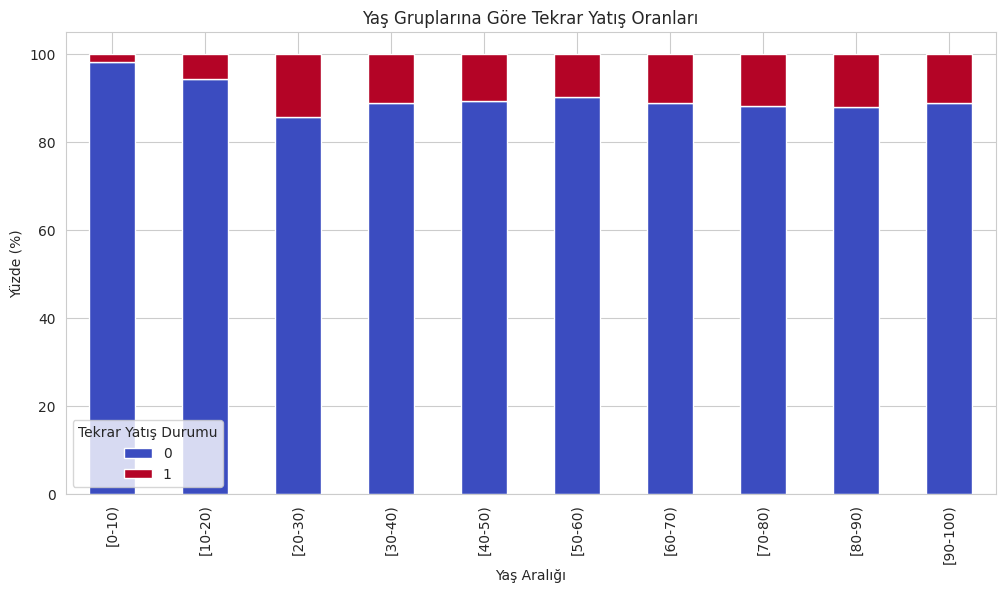

In [105]:
# 2. Seçenek: Yaş Grupları ve Tekrar Yatış İlişkisi
cross_tab_age = pd.crosstab(df['age'], df['target'], normalize='index') * 100
print(cross_tab_age)

# Görselleştirme
cross_tab_age.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='coolwarm')
plt.title('Yaş Gruplarına Göre Tekrar Yatış Oranları')
plt.ylabel('Yüzde (%)')
plt.xlabel('Yaş Aralığı')
plt.legend(title='Tekrar Yatış Durumu')
plt.show()

In [90]:
print("\n--- ARA ANALİZ: Ham ICD-9 Kodları (Gruplama Öncesi) ---")
print(f"diag_1 sütunundaki benzersiz (unique) kod sayısı: {df['diag_1'].nunique()}")
print(f"diag_2 sütunundaki benzersiz (unique) kod sayısı: {df['diag_2'].nunique()}")
print(f"diag_3 sütunundaki benzersiz (unique) kod sayısı: {df['diag_3'].nunique()}")


--- ARA ANALİZ: Ham ICD-9 Kodları (Gruplama Öncesi) ---
diag_1 sütunundaki benzersiz (unique) kod sayısı: 717
diag_1 sütunundaki benzersiz (unique) kod sayısı: 749
diag_1 sütunundaki benzersiz (unique) kod sayısı: 790


In [91]:
top_10_diag = df['diag_1'].value_counts().head(10)
print(top_10_diag)

diag_1
428    6862
414    6580
786    4016
410    3614
486    3508
427    2766
491    2275
715    2151
682    2042
434    2028
Name: count, dtype: int64


In [92]:
top_10_diag = df['diag_2'].value_counts().head(10)
print(top_10_diag)

diag_2
276    6752
428    6662
250    6071
427    5036
401    3736
496    3305
599    3288
403    2823
414    2650
411    2565
Name: count, dtype: int64


In [93]:
top_10_diag = df['diag_3'].value_counts().head(10)
print(top_10_diag)

diag_3
250    11555
401     8288
276     5175
428     4577
427     3955
414     3664
496     2605
403     2357
585     1992
272     1969
Name: count, dtype: int64


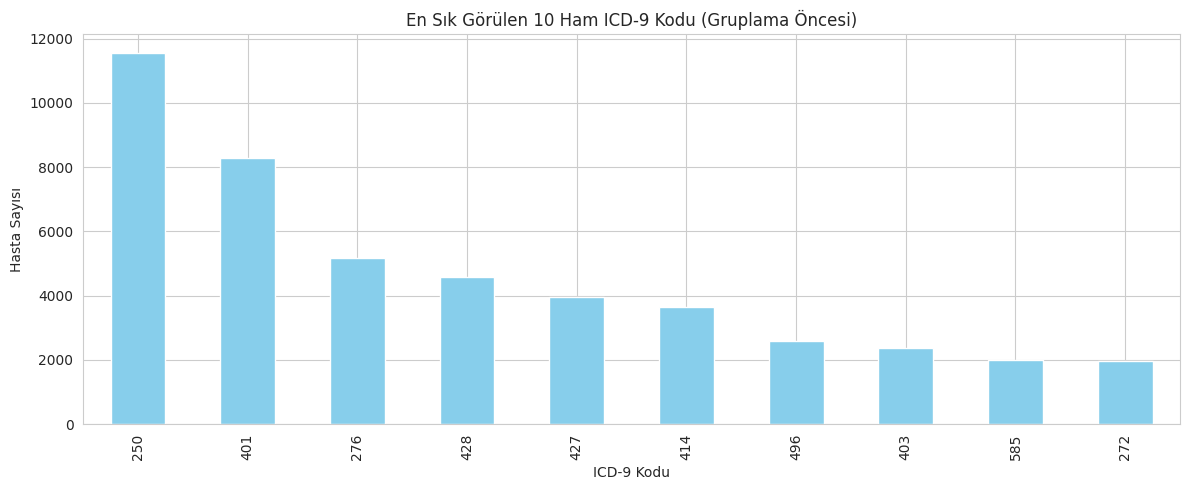

In [94]:
# Görselleştirme (Ham Kodların Dağılımı - Çok Karışık Olduğunu Göstermek İçin)
plt.figure(figsize=(12, 5))
top_10_diag.plot(kind='bar', color='skyblue')
plt.title('En Sık Görülen 10 Ham ICD-9 Kodu (Gruplama Öncesi)')
plt.xlabel('ICD-9 Kodu')
plt.ylabel('Hasta Sayısı')
plt.tight_layout()
plt.show()

In [95]:
print("\n--- ADIM 3.1: ICD-9 KODLARININ KEŞFİ (EN YÜKSEK FREKANSLI KODLAR) ---")
print("Tüm tanı sütunlarında (diag_1, diag_2, diag_3) en çok tekrar eden hastalıklar inceleniyor...")

# 1. Kütüphaneleri Kontrol Et
try:
    import icd9cms
    from googletrans import Translator
    translator = Translator()
    has_libraries = True
    print("[BAŞARILI] Tıbbi kod kütüphaneleri (icd9cms, googletrans) aktif.")
except ImportError:
    has_libraries = False
    print("[UYARI] icd9cms bulunamadı. Sadece kodlar ve gruplar listelenecek.")

# 2. EN SIK GEÇEN HASTALIKLARI BULMA (FREKANS BAZLI)
# Tüm tanı sütunlarını alt alta ekle
all_diags = pd.concat([df['diag_1']])

# Value Counts ile en çok tekrar edenleri al (Default olarak azalan sırada verir)
top_codes_series = all_diags.value_counts()
top_codes = top_codes_series.index.tolist()

print(f"Toplam {len(all_diags)} tanı kaydı içinden en sık görülen {len(top_codes)} kod analiz ediliyor...")

# 3. Kodların Anlamlarını Çek
discovery_list = []

for code in top_codes:
    code_str = str(code)
    frequency = top_codes_series[code] # Kaç kere geçmiş?

    eng_desc = "Tanım Yok"
    tr_desc = "-"

    if has_libraries:
        try:
            search_res = icd9cms.search(code_str)
            if search_res:
                if hasattr(search_res, 'long_desc') and search_res.long_desc:
                    eng_desc = str(search_res.long_desc)
                elif hasattr(search_res, 'short_desc') and search_res.short_desc:
                    eng_desc = str(search_res.short_desc)
                else:
                    eng_desc = str(search_res)

                # Çeviri
                try:
                    tr_desc = translator.translate(eng_desc, src='en', dest='tr').text.title()
                except:
                    tr_desc = "Çeviri Yapılamadı"
            else:
                eng_desc = "Kütüphanede Bulunamadı"
        except:
            eng_desc = "Kod Hatalı/Bulunamadı"

    discovery_list.append({
        'Kod': code_str,
        'Sıklık': frequency,
        'İngilizce Tanım': eng_desc,
        'Türkçe Tanım': tr_desc,
    })

# 4. Tabloyu Göster (Sıklığa göre sıralı olduğundan emin olalım)
discovery_df = pd.DataFrame(discovery_list)
discovery_df = discovery_df.sort_values(by='Sıklık', ascending=False)

print("\n[KEŞİF RAPORU] En Sık Görülen Hastalık Kodları ve Anlamları:")
print(discovery_df.to_string(index=False))


--- ADIM 3.1: ICD-9 KODLARININ KEŞFİ (EN YÜKSEK FREKANSLI KODLAR) ---
Tüm tanı sütunlarında (diag_1, diag_2, diag_3) en çok tekrar eden hastalıklar inceleniyor...
[BAŞARILI] Tıbbi kod kütüphaneleri (icd9cms, googletrans) aktif.
Toplam 101763 tanı kaydı içinden en sık görülen 717 kod analiz ediliyor...

[KEŞİF RAPORU] En Sık Görülen Hastalık Kodları ve Anlamları:
   Kod  Sıklık                                                                                                                  İngilizce Tanım                                                                                                                Türkçe Tanım
   428    6862                                                                                                                    Heart failure                                                                                                             Kalp Yetmezliği
   414    6580                                                                                    

/tmp/ipython-input-1305850883.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Kod', y='Sıklık', data=discovery_df.head(50), palette='viridis')


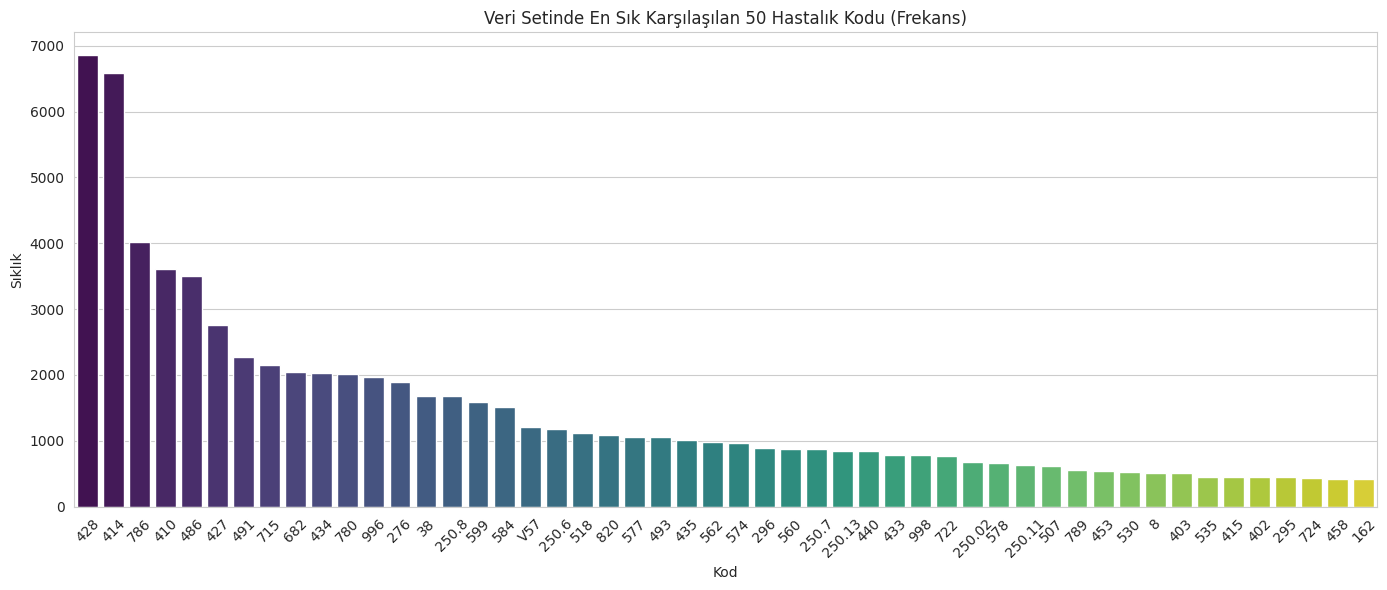

In [96]:
# Grafiksel Gösterim (İlk 20 Sık Hastalık)
plt.figure(figsize=(14, 6))
sns.barplot(x='Kod', y='Sıklık', data=discovery_df.head(50), palette='viridis')
plt.title('Veri Setinde En Sık Karşılaşılan 50 Hastalık Kodu (Frekans)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [97]:
print("\n--- ADIM 3.1: ICD-9 KODLARININ KEŞFİ (EN YÜKSEK FREKANSLI KODLAR) ---")
print("Tüm tanı sütunlarında (diag_1, diag_2, diag_3) en çok tekrar eden hastalıklar inceleniyor...")

# 1. Kütüphaneleri Kontrol Et
try:
    import icd9cms
    from googletrans import Translator
    translator = Translator()
    has_libraries = True
    print("[BAŞARILI] Tıbbi kod kütüphaneleri (icd9cms, googletrans) aktif.")
except ImportError:
    has_libraries = False
    print("[UYARI] icd9cms bulunamadı. Sadece kodlar ve gruplar listelenecek.")

# 2. EN SIK GEÇEN HASTALIKLARI BULMA (FREKANS BAZLI)
# Tüm tanı sütunlarını alt alta ekle
all_diags = pd.concat([df['diag_2']])

# Value Counts ile en çok tekrar edenleri al (Default olarak azalan sırada verir)
top_codes_series = all_diags.value_counts()
top_codes = top_codes_series.index.tolist()

print(f"Toplam {len(all_diags)} tanı kaydı içinden en sık görülen {len(top_codes)} kod analiz ediliyor...")

# 3. Kodların Anlamlarını Çek
discovery_list = []

for code in top_codes:
    code_str = str(code)
    frequency = top_codes_series[code] # Kaç kere geçmiş?

    eng_desc = "Tanım Yok"
    tr_desc = "-"

    if has_libraries:
        try:
            search_res = icd9cms.search(code_str)
            if search_res:
                if hasattr(search_res, 'long_desc') and search_res.long_desc:
                    eng_desc = str(search_res.long_desc)
                elif hasattr(search_res, 'short_desc') and search_res.short_desc:
                    eng_desc = str(search_res.short_desc)
                else:
                    eng_desc = str(search_res)

                # Çeviri
                try:
                    tr_desc = translator.translate(eng_desc, src='en', dest='tr').text.title()
                except:
                    tr_desc = "Çeviri Yapılamadı"
            else:
                eng_desc = "Kütüphanede Bulunamadı"
        except:
            eng_desc = "Kod Hatalı/Bulunamadı"

    discovery_list.append({
        'Kod': code_str,
        'Sıklık': frequency,
        'İngilizce Tanım': eng_desc,
        'Türkçe Tanım': tr_desc,
    })

# 4. Tabloyu Göster (Sıklığa göre sıralı olduğundan emin olalım)
discovery_df = pd.DataFrame(discovery_list)
discovery_df = discovery_df.sort_values(by='Sıklık', ascending=False)

print("\n[KEŞİF RAPORU] En Sık Görülen Hastalık Kodları ve Anlamları:")
print(discovery_df.to_string(index=False))


--- ADIM 3.1: ICD-9 KODLARININ KEŞFİ (EN YÜKSEK FREKANSLI KODLAR) ---
Tüm tanı sütunlarında (diag_1, diag_2, diag_3) en çok tekrar eden hastalıklar inceleniyor...
[BAŞARILI] Tıbbi kod kütüphaneleri (icd9cms, googletrans) aktif.
Toplam 101763 tanı kaydı içinden en sık görülen 749 kod analiz ediliyor...

[KEŞİF RAPORU] En Sık Görülen Hastalık Kodları ve Anlamları:
   Kod  Sıklık                                                                                                                                                                 İngilizce Tanım                                                                                                                                                                     Türkçe Tanım
   276    6752                                                                                                                            Disorders of fluid electrolyte and acid-base balance                                                                            

/tmp/ipython-input-4131495069.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Kod', y='Sıklık', data=discovery_df.head(20), palette='viridis')


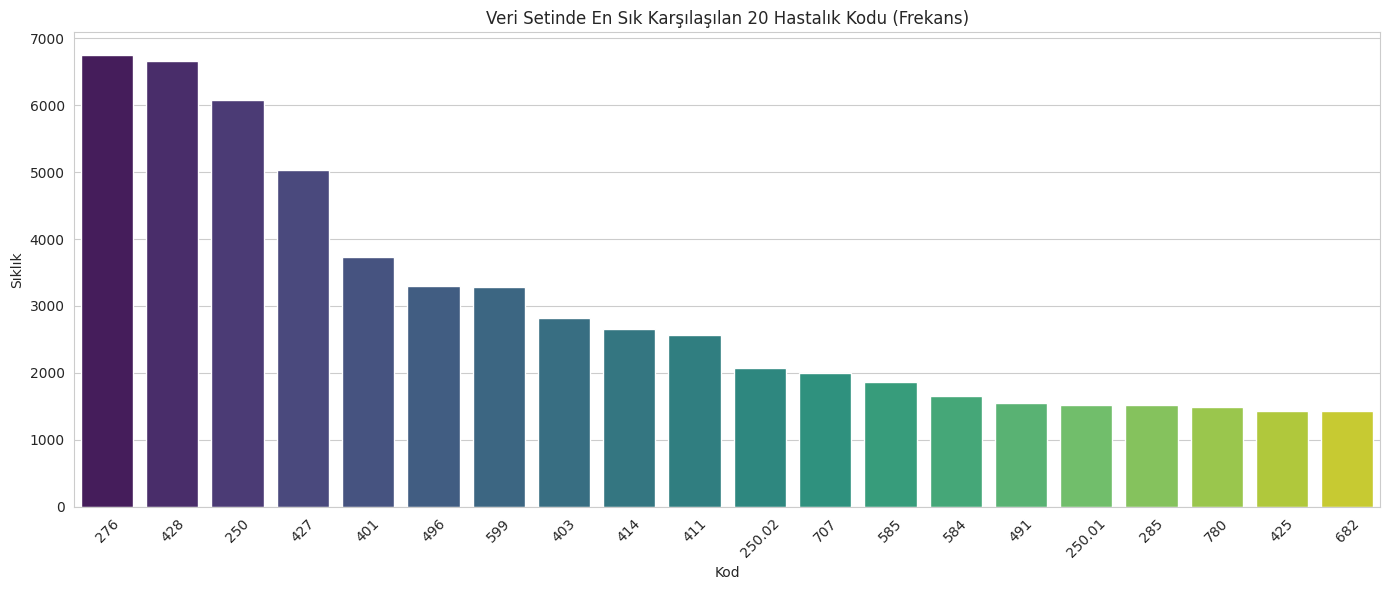

In [98]:
# Grafiksel Gösterim (İlk 20 Sık Hastalık)
plt.figure(figsize=(14, 6))
sns.barplot(x='Kod', y='Sıklık', data=discovery_df.head(20), palette='viridis')
plt.title('Veri Setinde En Sık Karşılaşılan 20 Hastalık Kodu (Frekans)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [99]:
print("\n--- ADIM 3.1: ICD-9 KODLARININ KEŞFİ (EN YÜKSEK FREKANSLI KODLAR) ---")
print("Tüm tanı sütunlarında (diag_1, diag_2, diag_3) en çok tekrar eden hastalıklar inceleniyor...")

# 1. Kütüphaneleri Kontrol Et
try:
    import icd9cms
    from googletrans import Translator
    translator = Translator()
    has_libraries = True
    print("[BAŞARILI] Tıbbi kod kütüphaneleri (icd9cms, googletrans) aktif.")
except ImportError:
    has_libraries = False
    print("[UYARI] icd9cms bulunamadı. Sadece kodlar ve gruplar listelenecek.")

# 2. EN SIK GEÇEN HASTALIKLARI BULMA (FREKANS BAZLI)
# Tüm tanı sütunlarını alt alta ekle
all_diags = pd.concat([df['diag_3']])

# Value Counts ile en çok tekrar edenleri al (Default olarak azalan sırada verir)
top_codes_series = all_diags.value_counts()
top_codes = top_codes_series.index.tolist()

print(f"Toplam {len(all_diags)} tanı kaydı içinden en sık görülen {len(top_codes)} kod analiz ediliyor...")

# 3. Kodların Anlamlarını Çek
discovery_list = []

for code in top_codes:
    code_str = str(code)
    frequency = top_codes_series[code] # Kaç kere geçmiş?

    eng_desc = "Tanım Yok"
    tr_desc = "-"

    if has_libraries:
        try:
            search_res = icd9cms.search(code_str)
            if search_res:
                if hasattr(search_res, 'long_desc') and search_res.long_desc:
                    eng_desc = str(search_res.long_desc)
                elif hasattr(search_res, 'short_desc') and search_res.short_desc:
                    eng_desc = str(search_res.short_desc)
                else:
                    eng_desc = str(search_res)

                # Çeviri
                try:
                    tr_desc = translator.translate(eng_desc, src='en', dest='tr').text.title()
                except:
                    tr_desc = "Çeviri Yapılamadı"
            else:
                eng_desc = "Kütüphanede Bulunamadı"
        except:
            eng_desc = "Kod Hatalı/Bulunamadı"

    discovery_list.append({
        'Kod': code_str,
        'Sıklık': frequency,
        'İngilizce Tanım': eng_desc,
        'Türkçe Tanım': tr_desc,
    })

# 4. Tabloyu Göster (Sıklığa göre sıralı olduğundan emin olalım)
discovery_df = pd.DataFrame(discovery_list)
discovery_df = discovery_df.sort_values(by='Sıklık', ascending=False)

print("\n[KEŞİF RAPORU] En Sık Görülen Hastalık Kodları ve Anlamları:")
print(discovery_df.to_string(index=False))


--- ADIM 3.1: ICD-9 KODLARININ KEŞFİ (EN YÜKSEK FREKANSLI KODLAR) ---
Tüm tanı sütunlarında (diag_1, diag_2, diag_3) en çok tekrar eden hastalıklar inceleniyor...
[BAŞARILI] Tıbbi kod kütüphaneleri (icd9cms, googletrans) aktif.
Toplam 101763 tanı kaydı içinden en sık görülen 790 kod analiz ediliyor...

[KEŞİF RAPORU] En Sık Görülen Hastalık Kodları ve Anlamları:
   Kod  Sıklık                                                                                                                                                                 İngilizce Tanım                                                                                                                                                                     Türkçe Tanım
   250   11555                                                                                                                                                               Diabetes mellitus                                                                            

/tmp/ipython-input-4131495069.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Kod', y='Sıklık', data=discovery_df.head(20), palette='viridis')


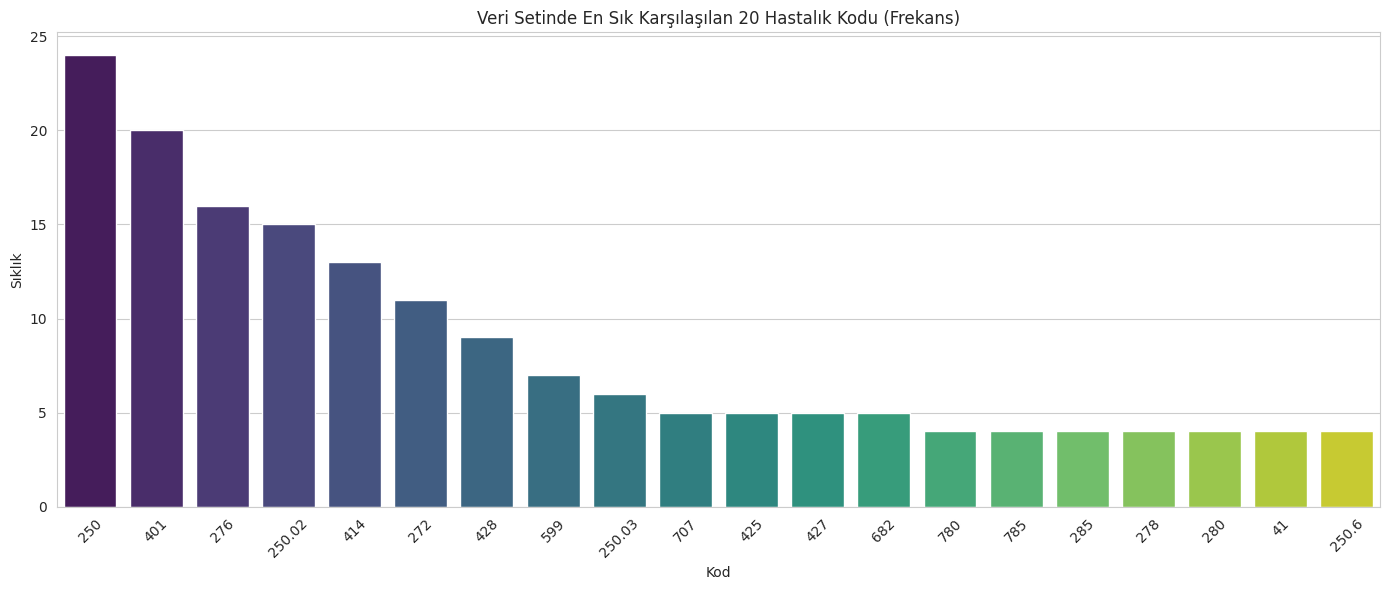

In [68]:
# Grafiksel Gösterim (İlk 20 Sık Hastalık)
plt.figure(figsize=(14, 6))
sns.barplot(x='Kod', y='Sıklık', data=discovery_df.head(20), palette='viridis')
plt.title('Veri Setinde En Sık Karşılaşılan 20 Hastalık Kodu (Frekans)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [146]:
def map_diagnosis(code):
    if pd.isna(code):
        return "Other"

    # Bazı kodlar 'V' veya 'E' ile başlar, bunları 'Other' grubuna alıyoruz
    try:
        code = float(code)
    except ValueError:
        return "Other"

    # Diyabet (250.xx)
    if 250 <= code < 251:
        return "Diabetes"
    # Dolaşım Sistemi (Circulatory)
    elif (390 <= code <= 459) or code == 785:
        return "Circulatory"
    # Solunum Sistemi (Respiratory)
    elif (460 <= code <= 519) or code == 786:
        return "Respiratory"
    # Sindirim Sistemi (Digestive)
    elif (520 <= code <= 579) or code == 787:
        return "Digestive"
    # Yaralanma ve Zehirlenme (Injury)
    elif 800 <= code <= 999:
        return "Injury"
    # Kas ve İskelet Sistemi (Musculoskeletal)
    elif 710 <= code <= 739:
        return "Musculoskeletal"
    # Ürogenital Sistem (Genitourinary)
    elif (580 <= code <= 629) or code == 788:
        return "Genitourinary"
    # Tümörler (Neoplasms)
    elif 140 <= code <= 239:
        return "Neoplasms"
    # Diğer
    else:
        return "Other"

In [122]:
print("\n--- ARA ANALİZ: ICD-9 Kod Haritası Kontrolü (Hangi kod nereye gidiyor?) ---")

# Tüm benzersiz tanı kodlarını topla
all_diag_codes = pd.concat([df['diag_1'], df['diag_2'], df['diag_3']]).unique()

# Geçici bir DataFrame oluştur ve eşleştirme yap
mapping_check = pd.DataFrame({'Orjinal_Kod': all_diag_codes})
mapping_check['Atanan_Grup'] = mapping_check['Orjinal_Kod'].apply(map_diagnosis)

# Her grup için 5 örnek kod göster
groups = mapping_check['Atanan_Grup'].unique()
print(f"{'GRUP ADI':<20} | {'ÖRNEK KODLAR (İlk 5)'}")
print("-" * 60)
for group in groups:
    examples = mapping_check[mapping_check['Atanan_Grup'] == group]['Orjinal_Kod'].head(5).tolist()
    # Kodları string olarak birleştir
    examples_str = ", ".join([str(e) for e in examples])
    print(f"{group:<20} | {examples_str}")
print("-" * 60)


--- ARA ANALİZ: ICD-9 Kod Haritası Kontrolü (Hangi kod nereye gidiyor?) ---
GRUP ADI             | ÖRNEK KODLAR (İlk 5)
------------------------------------------------------------
Diabetes             | 250.83, 250.7, 250.6, 250.4, 250.11
Other                | 276, 648, 8, 682, V57
Neoplasms            | 197, 157, 189, 174, 196
Circulatory          | 414, 428, 398, 434, 410
Respiratory          | 518, 786, 462, 473, 486
Injury               | 999, 996, 998, 845, 808
Musculoskeletal      | 737, 722, 715, 730, 738
Digestive            | 572, 564, 556, 578, 569
Genitourinary        | 584, 626, 618, 590, 599
------------------------------------------------------------


In [147]:
# Önce ICD-9 kodlarını gruplayan fonksiyonunu tanımlandı (map_diagnosis)

print("\n--- ADIM 3.2: AKILLI HASTALIK ETİKETLEME (COMORBIDITY FLAGS) ---")

# 1. Önce geçici olarak her üç sütunu da gruplayalım
# (Orijinal df üzerinde değişiklik yapmadan önce kopyasını alalım ki hata olmasın)
df_temp = df.copy()
for col in ['diag_1', 'diag_2', 'diag_3']:
    df_temp[col] = df_temp[col].apply(map_diagnosis)

# 2. Hangi hastalık gruplarımız vardı?
disease_categories = [
    'Circulatory', 'Respiratory', 'Digestive', 'Diabetes',
    'Injury', 'Musculoskeletal', 'Genitourinary', 'Neoplasms'
]

# 3. Her hastalık grubu için "Bu hastada var mı?" sütunu (Flag) oluşturma
# diag_1, diag_2 YA DA diag_3'te bu hastalık varsa 1, yoksa 0 yaz.
for disease in disease_categories:
    df[f'has_{disease}'] = df_temp.apply(
        lambda row: 1 if (row['diag_1'] == disease or
                          row['diag_2'] == disease or
                          row['diag_3'] == disease) else 0,
        axis=1
    )

# 4. Sadece diag_1_group'u (Ana Tanı) ayrıca kategorik olarak tutabiliriz
# Çünkü ana yatış sebebi diğerlerinden daha önemli olabilir.
df['primary_diagnosis'] = df_temp['diag_1']

# 5. Artık eski diag sütunlarını güvenle atabiliriz
df = df.drop(['diag_1', 'diag_2', 'diag_3'], axis=1)

print("İşlem Tamamlandı!")
print("Yeni eklenen sütunlar: has_Circulatory, has_Diabetes, has_Respiratory vb.")
display(df.head())


--- ADIM 3.2: AKILLI HASTALIK ETİKETLEME (COMORBIDITY FLAGS) ---
İşlem Tamamlandı!
Yeni eklenen sütunlar: has_Circulatory, has_Diabetes, has_Respiratory vb.


,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,target,has_Circulatory,has_Respiratory,has_Digestive,has_Diabetes,has_Injury,has_Musculoskeletal,has_Genitourinary,has_Neoplasms,primary_diagnosis
0,Caucasian,Female,[0-10),6,25,1,1,41,0,1,0,0,0,1,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,0,0,0,0,1,0,0,0,0,Diabetes
1,Caucasian,Female,[10-20),1,1,7,3,59,0,18,0,0,0,9,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,0,0,0,0,1,0,0,0,0,Other
2,AfricanAmerican,Female,[20-30),1,1,7,2,11,5,13,2,0,1,6,NaN,NaN,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,0,0,0,0,1,0,0,0,0,Other
3,Caucasian,Male,[30-40),1,1,7,2,44,1,16,0,0,0,7,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,0,1,0,0,1,0,0,0,0,Other
4,Caucasian,Male,[40-50),1,1,7,1,51,0,8,0,0,0,5,NaN,NaN,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,0,0,0,0,1,0,0,0,1,Neoplasms


/tmp/ipython-input-2410841889.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='primary_diagnosis', order=order, palette='viridis')


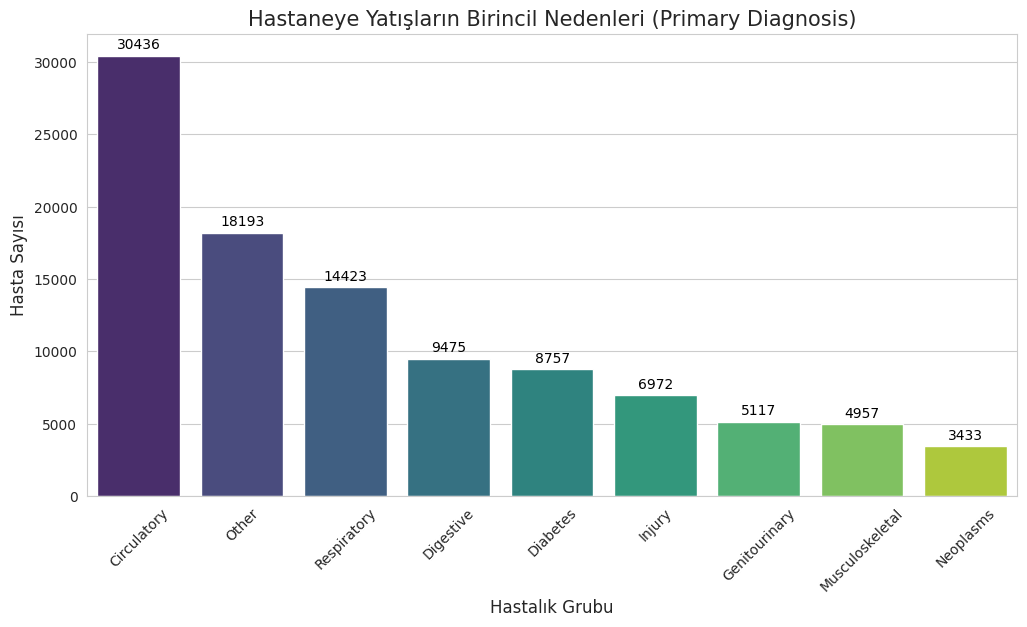

In [150]:
import seaborn as sns
import matplotlib.pyplot as plt

# Grafik boyutu
plt.figure(figsize=(12, 6))

# Hangi sırayla gösterileceğini belirle (En çoktan en aza)
order = df['primary_diagnosis'].value_counts().index

# Çubuk Grafiği Çiz
ax = sns.countplot(data=df, x='primary_diagnosis', order=order, palette='viridis')

# Süslemeler
plt.title('Hastaneye Yatışların Birincil Nedenleri (Primary Diagnosis)', fontsize=15)
plt.xlabel('Hastalık Grubu', fontsize=12)
plt.ylabel('Hasta Sayısı', fontsize=12)
plt.xticks(rotation=45) # Yazılar sığsın diye eğik yap

# Çubukların üzerine sayıları yaz
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

In [151]:
df.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,target,has_Circulatory,has_Respiratory,has_Digestive,has_Diabetes,has_Injury,has_Musculoskeletal,has_Genitourinary,has_Neoplasms,primary_diagnosis
0,Caucasian,Female,[0-10),6,25,1,1,41,0,1,0,0,0,1,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,0,0,0,0,1,0,0,0,0,Diabetes
1,Caucasian,Female,[10-20),1,1,7,3,59,0,18,0,0,0,9,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,0,0,0,0,1,0,0,0,0,Other
2,AfricanAmerican,Female,[20-30),1,1,7,2,11,5,13,2,0,1,6,NaN,NaN,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,0,0,0,0,1,0,0,0,0,Other
3,Caucasian,Male,[30-40),1,1,7,2,44,1,16,0,0,0,7,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,0,1,0,0,1,0,0,0,0,Other
4,Caucasian,Male,[40-50),1,1,7,1,51,0,8,0,0,0,5,NaN,NaN,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,0,0,0,0,1,0,0,0,1,Neoplasms


In [152]:
#4. Hücre: Veri Dönüştürme (Age, Change, Medications)
# 1. Yaş (Age) Aralığını Orta Noktaya Çevirme
# Örn: [0-10) -> 5, [10-20) -> 15 ...
age_dict = {
    '[0-10)': 5, '[10-20)': 15, '[20-30)': 25, '[30-40)': 35,
    '[40-50)': 45, '[50-60)': 55, '[60-70)': 65, '[70-80)': 75,
    '[80-90)': 85, '[90-100)': 95
}
df['age'] = df['age'].replace(age_dict)

print("Veri dönüşümleri tamamlandı.")

Veri dönüşümleri tamamlandı.


/tmp/ipython-input-3507622139.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['age'] = df['age'].replace(age_dict)


In [153]:
# Kategorik ve sayısal sütunları ayıralım
cat_cols = df.select_dtypes(include=['object']).columns
num_cols = df.select_dtypes(include=np.number).columns

print(f"\n--- Tespit Edilen Kategorik Sütunlar ({len(cat_cols)} adet) ---")

# Özet Tablosu Oluşturma (İsim, Benzersiz Değer Sayısı, İlk Değer Örneği)
cat_summary = []
for col in cat_cols:
    cat_summary.append({
        'Sütun Adı': col,
        'Benzersiz Sayısı': df[col].nunique(),
        'Örnek Değer (İlk)': df[col].iloc[0],
        'Veri Tipi': df[col].dtype
    })

cat_summary_df = pd.DataFrame(cat_summary).sort_values(by='Benzersiz Sayısı', ascending=False)
print(cat_summary_df.to_string(index=False)) # Tabloyu düzgün formatta yazdır


--- Tespit Edilen Kategorik Sütunlar (30 adet) ---
               Sütun Adı  Benzersiz Sayısı Örnek Değer (İlk) Veri Tipi
       primary_diagnosis                 9          Diabetes    object
                    race                 5         Caucasian    object
               metformin                 4                No    object
             glimepiride                 4                No    object
          chlorpropamide                 4                No    object
             repaglinide                 4                No    object
            pioglitazone                 4                No    object
               glyburide                 4                No    object
               glipizide                 4                No    object
     glyburide-metformin                 4                No    object
                acarbose                 4                No    object
                miglitol                 4                No    object
           rosiglitazone 

In [155]:
#5. Hücre: One-Hot Encoding (Son Aşama)
# Kategorik sütunları belirle
categorical_cols = [
    'race', 'gender', 'admission_type_id', 'discharge_disposition_id',
    'admission_source_id', 'max_glu_serum', 'A1Cresult',
    'primary_diagnosis', # Burası düzeltildi: eski diag_group'lar yerine primary_diagnosis eklendi
    # Yeni eklenen medication ve diğer kategorik sütunla
    'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
    'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone',
    'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide',
    'examide', 'citoglipton', 'insulin', 'glyburide-metformin',
    'glipizide-metformin', 'glimepiride-pioglitazone',
    'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed'
]

# Pandas get_dummies ile One-Hot Encoding
# drop_first=True diyerek dummy variable tuzağından kaçınıyoruz.
df_processed = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

print(f"İşlenmiş Veri Seti Son Hali: {df_processed.shape}")
df_processed.head()

İşlenmiş Veri Seti Son Hali: (101763, 133)


,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,target,has_Circulatory,has_Respiratory,has_Digestive,has_Diabetes,has_Injury,has_Musculoskeletal,has_Genitourinary,has_Neoplasms,race_Asian,race_Caucasian,race_Hispanic,race_Other,gender_Male,admission_type_id_2,admission_type_id_3,admission_type_id_4,admission_type_id_5,admission_type_id_6,admission_type_id_7,admission_type_id_8,discharge_disposition_id_2,discharge_disposition_id_3,discharge_disposition_id_4,discharge_disposition_id_5,discharge_disposition_id_6,discharge_disposition_id_7,discharge_disposition_id_8,discharge_disposition_id_9,discharge_disposition_id_10,discharge_disposition_id_11,discharge_disposition_id_12,discharge_disposition_id_13,discharge_disposition_id_14,discharge_disposition_id_15,discharge_disposition_id_16,discharge_disposition_id_17,discharge_disposition_id_18,discharge_disposition_id_19,discharge_disposition_id_20,discharge_disposition_id_22,discharge_disposition_id_23,discharge_disposition_id_24,discharge_disposition_id_25,discharge_disposition_id_27,discharge_disposition_id_28,admission_source_id_2,admission_source_id_3,admission_source_id_4,admission_source_id_5,admission_source_id_6,admission_source_id_7,admission_source_id_8,admission_source_id_9,admission_source_id_10,admission_source_id_11,admission_source_id_13,admission_source_id_14,admission_source_id_17,admission_source_id_20,admission_source_id_22,admission_source_id_25,max_glu_serum_>300,max_glu_serum_Norm,A1Cresult_>8,A1Cresult_Norm,primary_diagnosis_Diabetes,primary_diagnosis_Digestive,primary_diagnosis_Genitourinary,primary_diagnosis_Injury,primary_diagnosis_Musculoskeletal,primary_diagnosis_Neoplasms,primary_diagnosis_Other,primary_diagnosis_Respiratory,metformin_No,metformin_Steady,metformin_Up,repaglinide_No,repaglinide_Steady,repaglinide_Up,nateglinide_No,nateglinide_Steady,nateglinide_Up,chlorpropamide_No,chlorpropamide_Steady,chlorpropamide_Up,glimepiride_No,glimepiride_Steady,glimepiride_Up,acetohexamide_Steady,glipizide_No,glipizide_Steady,glipizide_Up,glyburide_No,glyburide_Steady,glyburide_Up,tolbutamide_Steady,pioglitazone_No,pioglitazone_Steady,pioglitazone_Up,rosiglitazone_No,rosiglitazone_Steady,rosiglitazone_Up,acarbose_No,acarbose_Steady,acarbose_Up,miglitol_No,miglitol_Steady,miglitol_Up,troglitazone_Steady,tolazamide_Steady,tolazamide_Up,insulin_No,insulin_Steady,insulin_Up,glyburide-metformin_No,glyburide-metformin_Steady,glyburide-metformin_Up,glipizide-metformin_Steady,glimepiride-pioglitazone_Steady,metformin-rosiglitazone_Steady,metformin-pioglitazone_Steady,change_No,diabetesMed_Yes
0,5,1,41,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,True,False,False,True,False,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,True,False
1,15,3,59,0,18,0,0,0,9,0,0,0,0,1,0,0,0,0,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,True,False,False,True,False,False,False,True,False,False,True,False,False,True,Fal

In [159]:
# Veriyi CSV formatında kaydetme
# index=False parametresi çok önemlidir, yoksa gereksiz bir index sütunu oluşturur.
df_processed.to_csv('diabetic_data_processed.csv', index=False)

print("Veri seti başarıyla 'diabetic_data_processed.csv' olarak kaydedildi.")

Veri seti başarıyla 'diabetic_data_processed.csv' olarak kaydedildi.


In [161]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight

# 1. Hazırladığın temiz veriyi yükle
# (Önceki adımda kaydettiğin dosya adını buraya yaz)
df = pd.read_csv('diabetic_data_processed.csv')

# 2. X ve y ayrımı
X = df.drop('target', axis=1)
y = df['target']

# 3. STRATIFIED SPLIT (Katmanlı Bölme)
# stratify=y parametresi KRİTİKTİR.
# Bu sayede eğitim setindeki ve test setindeki riskli hasta oranı EŞİT olur.
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print(f"Eğitim Seti Boyutu: {X_train.shape}")
print(f"Test Seti Boyutu: {X_test.shape}")

# --- BURASI ÇOK ÖNEMLİ: Class Weight Hesaplama ---
# Modelin "Azınlık sınıfı (1)" daha değerli görmesi için ağırlıkları hesaplıyoruz.
classes = np.unique(y_train)
weights = compute_class_weight(class_weight='balanced', classes=classes, y=y_train)
class_weights = dict(zip(classes, weights))

print("\n--- MODEL İÇİN HESAPLANAN AĞIRLIKLAR (Class Weights) ---")
print(f"0 (Yatmaz) Ağırlığı: {class_weights[0]:.4f}")
print(f"1 (Yatar) Ağırlığı:  {class_weights[1]:.4f}")
print("-" * 50)
print("YORUM: 1 sınıfının ağırlığı daha yüksek çıkmalı.")
print("Bu sayıları modellerin parametresine (class_weight=...) vereceksiniz.")
print("-" * 50)

# 4. Verileri Kaydetme
X_train.to_csv('X_train.csv', index=False)
X_test.to_csv('X_test.csv', index=False)
y_train.to_csv('y_train.csv', index=False)
y_test.to_csv('y_test.csv', index=False)

print("\nVeriler başarıyla kaydedildi!")

Eğitim Seti Boyutu: (81410, 132)
Test Seti Boyutu: (20353, 132)

--- MODEL İÇİN HESAPLANAN AĞIRLIKLAR (Class Weights) ---
0 (Yatmaz) Ağırlığı: 0.5628
1 (Yatar) Ağırlığı:  4.4800
--------------------------------------------------
YORUM: 1 sınıfının ağırlığı daha yüksek çıkmalı.
Bu sayıları modellerin parametresine (class_weight=...) vereceksiniz.
--------------------------------------------------

Veriler başarıyla kaydedildi!
